In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as P
%matplotlib inline

# Make up some noisy data points

In [6]:
N = 100
a = 0.8
x = np.linspace(-1, 1, N)
y = a * x + np.random.normal(0, 0.2, N)

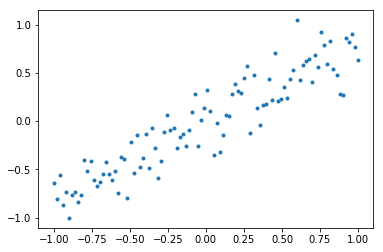

In [7]:
P.plot(x, y, '.');

# Build a TF network to predict y from x's

In [9]:
class Model():
    pass
m = Model()
m.x = tf.placeholder(tf.float32, (None, 1))
m.a = tf.Variable(0.0)
m.b = tf.Variable(0.0)
m.y = m.a * m.x + m.b # This uses very involved notion of broadcasting
m.ref = tf.placeholder(tf.float32, (None, 1))
m.err = tf.reduce_mean(tf.pow(m.y - m.ref, 2))

# Train the model to minimize error

In [33]:
learning_rate = 0.04
epochs = 100
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(m.err)

In [34]:
s = tf.Session()
s.run(tf.global_variables_initializer())
feed = {m.x: x.reshape(100, 1), m.ref: y.reshape(100,1)}

In [38]:
for i in range(epochs):
    err, _ = s.run([m.err, optimizer], feed_dict=feed)
    if i % (epochs / 10) == 0:
        print("[%d] error = %.4f" % (i, err))
print("Done with:", s.run((m.a, m.b)))

[0] error = 0.0373
[10] error = 0.0373
[20] error = 0.0373
[30] error = 0.0373
[40] error = 0.0373
[50] error = 0.0373
[60] error = 0.0373
[70] error = 0.0373
[80] error = 0.0373
[90] error = 0.0373
('Done with:', (0.80217338, -0.0072327023))


In [39]:
(ma, mb) = s.run((m.a, m.b))

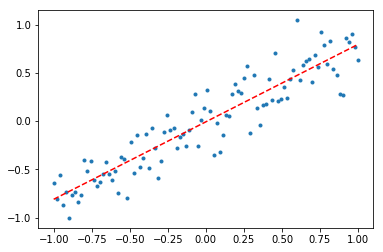

In [41]:
P.plot(x, y, '.', x, ma*x + mb, '--r')